# Data Engineering
`Donwloading and creating the dataset for the LyricsGenerator task.`

**Project Repository:** https://github.com/Tr33Bug/ML-NLP-LyricsGen-Transformer

Ressources:
- https://ruder.io/recent-advances-lm-fine-tuning/
- https://towardsdatascience.com/how-to-fine-tune-gpt-2-for-text-generation-ae2ea53bc272
- http://jalammar.github.io/illustrated-gpt2/

## Notebook Setup


In [2]:
# installation: 
! pip install lyricsgenius
! pip install pandas
! pip install regex
! pip install matplotlib

In [3]:
# imports and setup
import lyricsgenius
import os
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [4]:
#### FILE PATHS
# root path
root = './'

# dataset from spotify list (deprecated)
geniusDataset = root + 'datasets/genius/'
geniusCleanDataset = root + 'datasets/geniusClean/'

# dataset from IMDP Top 100 Rap Artists
geniusTopRapIMDB = root + 'datasets/geniusTopRapIMDB/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'

# dataset from IMDP top 100 artists all time and top 21th century artists
geniusTopIMDB = root + 'datasets/geniusTopIMDB/'
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'

# API token path
tokenPath = root + 'geniusToken.txt'


## Setup API-Connection

Using: 
- the Genius API from genius.com (https://docs.genius.com/#/getting-started-h1)
- the LyricsGenius-Framework (https://github.com/johnwmillr/LyricsGenius)
---

In [13]:
# Genius API Access Token
# get token at: https://genius.com/api-clients
# load token from file
with open(tokenPath, 'r') as file:
    GENIUS_ACCESS_TOKEN = str(file.read())

    # delete last newline character from token
    # GENIUS_ACCESS_TOKEN = GENIUS_ACCESS_TOKEN[:-1]
    file.close()

print(GENIUS_ACCESS_TOKEN)

VwcGmXppVPXEitVnlLnG2SZPDYeJznffxwdU9EtcFe6B7Pshtwtwjqb1ckHjDy9K


In [14]:
# test connection'
genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN)

In [15]:
# function to save every song to one file
def writeSongToFile(artist):
    for song in artist.songs:
        # save song in a file called artistname-songname.txt
        song.save_lyrics(filename='Lyrics_' + song.artist + '_' + song.title, extension='txt', verbose=True)


In [16]:
# function to move all files starting with 'Lyrics_' to path
def moveLyricsFiles(fromPath, toPath):
    for filename in os.listdir(fromPath):
        if filename.startswith('Lyrics_'):
            os.rename(filename, toPath + filename)


### Test API-Connetction

In [18]:
# test connection with Colplay as example
artist = genius.search_artist("Coldplay", max_songs=2, sort="popularity")
print(artist.songs)

Searching for songs by Coldplay...

Song 1: "Viva la Vida"
Song 2: "The Scientist"

Reached user-specified song limit (2).
Done. Found 2 songs.
[Song(id, artist, ...), Song(id, artist, ...)]


In [19]:
# print lyrics of first song from example
print(artist.songs[0].lyrics)

Translationsहिन्दीTürkçeEspañolPortuguêsDeutschFrançaisViva la Vida Lyrics[Verse 1: Chris Martin]
I used to rule the world
Seas would rise when I gave the word
Now in the morning, I sleep alone
Sweep the streets I used to own

[Interlude]

[Verse 2: Chris Martin]
I used to roll the dice
Feel the fear in my enemies' eyes
Listen as the crowd would sing
"Now the old king is dead, long live the king"
One minute, I held the key
Next, the walls were closed on me
And I discovered that my castles stand
Upon pillars of salt and pillars of sand
[Chorus: Chris Martin]
I hear Jerusalem bells a-ringin'
Roman cavalry choirs are singin'
Be my mirror, my sword and shield
My missionaries in a foreign field
For some reason I can't explain
Once you'd gone, there was never
Never an honest word
And that was when I ruled the world

[Interlude]

[Verse 3: Chris Martin]
It was the wicked and wild wind
Blew down the doors to let me in
Shattered windows and the sound of drums
People couldn't believe what I'd be

In [20]:
# test writing lyrics to file function for example
#writeSongToFile(artist)

In [21]:
# test moving lyrics files to dataset folder for example
#moveLyricsFiles(root, geniusDataset)

## Create Artist Lists

Ressources:
- Top 49 20th Century: https://www.imdb.com/list/ls058480497/
- Top 100 AllTime: https://www.imdb.com/list/ls064818015/
- Top Rapper: https://www.imdb.com/list/ls054191097/
- Spotify Dataset: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021 **(deprected)**
---

In [40]:
# load csv to dataframe
# df = pd.read_csv(root + 'datasets/spotify_dataset.csv')

# list of top musicians from IMDB
df_top49 = pd.read_csv(root + 'datasets/Top100GreatestMusicArtistsofAll-TimeIMDB.csv')
df_top20s = pd.read_csv(root + 'datasets/Top100GreatestMusiciansSincethe20thCenturyIMDB.csv')
df_topRap = pd.read_csv(root + 'datasets/Top100rappersIMDB.csv')

# create list of all dataframes
df_list = [df_top49, df_top20s, df_topRap]

In [47]:

for df in df_list:
    # sort all dataframe by Name
    df.sort_values(by=['Name'], inplace=True, ascending=True)

    # remove all rows except for the Name
    df.drop(df.columns.difference(['Name']), 1, inplace=True)

    # print len of dataframes
    print(len(df))

49
100
100


/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_54690/3590710727.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Name']), 1, inplace=True)


In [48]:
df_top20s.head()

,Name
62,AC/DC
54,Aerosmith
36,Alice Cooper
97,Amy Winehouse
79,Anthrax


In [49]:
df_top49.head()

,Name
22,AC/DC
25,Aretha Franklin
47,Beyoncé
6,Bob Dylan
9,Bob Marley


In [50]:
df_topRap.head()

,Name
31,50 Cent
39,AZ
10,André 3000
54,Anthony 'Treach' Criss
46,Beanie Sigel


In [53]:
#### MERGE TOP 49 AND TOP 20s INTO ONE DATAFRAME topArtists
# get all Names from df_top49 and df_top20s in a list
names_top49 = df_top49['Name'].tolist()
names_top20s = df_top20s['Name'].tolist()

# merge both lists
topArtistsList = names_top49 + names_top20s
topRapper = df_topRap['Name'].tolist()

# remove duplicates
topArtistsList = list(dict.fromkeys(topArtistsList))

# print(topArtistsList)
# print(len(topArtistsList))

108


In [54]:

#### GENEREATE TOP 100 RAPPER LIST
# delete all entries from topRapper that are also in topArtistsList
topRapper = [x for x in topRapper if x not in topArtistsList]

# sort list
topRapper.sort()

# generate topRapper list
topRapper = list(filter(None, topRapper))

# remove whitespaces from start and end of strings
topRapper = [x.strip() for x in topRapper]

# print(topRapper)
print(len(topRapper))

93


In [55]:
# print total number of Artists 
print('Total number of Artists is:', len(topArtistsList) + len(topRapper))

Total number of Artists is: 201


## Generate Dataset

using:
- top 100 Artists from streaming numbers extracted from:
    - https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021
- getting 20 songs from every artist
    - getting it from genius.com with lyricsgenius
        - https://github.com/johnwmillr/LyricsGenius
    - sortet after popularity
- writing a txt file for every artist and saving it to 'datasets/genius/'
---

In [5]:
# constants
NUM_SONGS = 50
NUM_ARTISTS = 108
LIST_TO_USE = 'Rap' # 'Top' or 'Rap'

In [6]:
# lists to get songs from
print(len(topArtistsList))
print(len(topRapper))

NameError: name 'topArtistsList' is not defined

In [207]:
# define list to use with genius api
if LIST_TO_USE == 'Top':
    artistList = topArtistsList
elif LIST_TO_USE == 'Rap':
    artistList = topRapper
else:
    print('Error: LIST_TO_USE not set correctly')

print('Current list:', LIST_TO_USE, '\nLen:', len(artistList))




Current list: Rap 
Len: 93


In [208]:
# write top artists to file
with open(root + 'datasets/topArtists.txt', 'w') as f:
    for item in artistList:
        f.write("%s\n" % item)

# insert new line for every ',' in file topArtists.txt
with open(root + 'datasets/topArtists.txt', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].replace(',', '\n')
    with open(root + 'datasets/topArtists.txt', 'w') as f:
        f.writelines(lines)
f.close()



In [209]:
# read top artists from file
with open(root + 'datasets/topArtists.txt', 'r') as f:
    artistList = f.read().split('\n')
    
# sort list alphabetically
artistList.sort()

# remove empty strings from list
artistList = list(filter(None, artistList))

# remove whitespaces from start and end of strings
artistList = [x.strip() for x in artistList]

# remove duplicates
artistList = list(dict.fromkeys(artistList))


# print every artist from list 
#for artist in artistList:
#    print(artist)
    
print(len(artistList))



93


In [210]:
# get lyrics for top artists
artistFile = []
for person in artistList:
    print(person)
    try:
        artistFile = genius.search_artist(person, max_songs=NUM_SONGS, sort="popularity")
        # artistFile.save_lyrics(extension='txt', verbose=True)
        # if songs found, write to file
        if artistFile.songs:
            writeSongToFile(artistFile)
        else:
            print('No songs found for ' + person)
    except:
        print('Error with:', person,'Got:', artistFile)

50 Cent
Searching for songs by 50 Cent...

Error with: 50 Cent Got: []
AZ
Searching for songs by AZ...

Changing artist name to 'Iggy Azalea'
Song 1: "Work"
Error with: AZ Got: []
André 3000
Searching for songs by André 3000...

Error with: André 3000 Got: []
Anthony 'Treach' Criss
Searching for songs by Anthony 'Treach' Criss...

Changing artist name to 'Treach'
Error with: Anthony 'Treach' Criss Got: []
Beanie Sigel
Searching for songs by Beanie Sigel...

Song 1: "Feel It in the Air"
Error with: Beanie Sigel Got: []
Big Boi
Searching for songs by Big Boi...



In [1]:
# define dataset path depending on list used
if LIST_TO_USE == 'Top':
    datasetPath = geniusTopIMDB
elif LIST_TO_USE == 'Rap':
    datasetPath = geniusTopRapIMDB
else:
    print('Error: LIST_TO_USE not set correctly')

# move lyrics files to geniusDataset
moveLyricsFiles(root, datasetPath)

NameError: name 'LIST_TO_USE' is not defined

In [ ]:
# get number of files in geniusDataset
print('GeniusTopRap:', len(os.listdir(geniusTopRapIMDB)))
print('GeniusTop:',len(os.listdir(geniusTopIMDB)))

print('Genius:', len(os.listdir(geniusDataset)))
print('GeniusClean:', len(os.listdir(geniusCleanDataset)))



GeniusTopRap: 724
GeniusTop: 801
Genius: 0
GeniusClean: 48


## Cleaning Dataset

what to delete:
- all non englisch artists
- `워`
- `Translations`... to `\n`
- all non english characters
- `()` --> Replace with whitespace
- all between `[]`
- number+`Embed`... to `\n`
- `like2Embed` to `\n`

--> delete all non english files manual

In [7]:
# define dataset paths
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'
geniusCleanDataset = root + 'datasets/geniusClean/'

In [88]:
# define function to delete al 워 from a txt file from directory path
def cleanFiles(path):
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(path + filename, 'r') as f:
                text = f.read()
                # insert new line at end of text
                text = text + '\n'
                text = text.replace('워', '')
                text = text.replace('(', ' ')
                text = text.replace(')', ' ')
                # delete all between []
                text = re.sub(r'\[.*?\]', '', text)
                # delete all number + 'Embed' to \n
                text = re.sub(r'\d*Embed.*?\n', '', text)
                # delete all from 'Translations' to \n
                text = re.sub(r'Translations*?\n', '', text)
                # delete all chinese characters
                text = re.sub(r'[\u4e00-\u9fff]+', '', text)
                # delete all non english characters
                text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
                # delete all empty lines except the last in the file
                text = re.sub(r'(?m)^\s*?\n', '', text)
                # delete all whitespace in front of a line
                text = re.sub(r'(?m)^\s+', '', text)

                # get songname from filename
                try:
                    songname = filename.split('_')[2]
                except:
                    songname = filename


                # delete .txt from songname
                songname = songname.replace('.txt', '')
                
                
                # delete songtext + Lyrics from textfile
                text = text.replace(songname + ' Lyrics', '')

            
                text = text.replace('You might also likeEmbed', '')
                text = text.replace('Embed\n', '\n')
                text = text.replace('You might also like', '\n')

            with open(path + filename, 'w') as f:
                f.write(text)
            
    print('✅ --> Cleaning', path, 'done!')


In [89]:
# run function to clean files on clean folders
cleanFiles(geniusTopIMDBClean)
cleanFiles(geniusTopRapIMDBClean)
cleanFiles(geniusCleanDataset)

Sex Crime 1984
Fuck Me Pumps
No More No More
Whats So Funny Bout Peace Love and Understanding
Machine Gun  Live at Fillmore East 1170 First Show
Dead Babies
Im Sticking with You
Ol Man River
I Saw the Light
Clap
Clones Were All
Between the Cheats
Senior Service
Jailbreak
Stand By Me
Georgia Blues
Red White and Blue
Ive Got a Mind to Give Up Living
Halo of Flies
Billion Dollar Babies
Sexcrime Nineteen EightyFour
Ballbreaker
Never Make Your Move Too Soon
This Years Girl
Repentless
Veronica
Brutal Planet
Hello Hooray
Whiskey Rock a Roller
Train Kept ARollin
Rock Me Baby
Ezy Rider
Dont Ask Me No Questions
Elected
Jihad
Lambo
I Love You More Than Youll Ever Know
Epidemic
Cult
Uncle Salty
Best Friends Right
High Voltage
Im Not Like Everybody Else
Behind the Crooked Cross
Like Smoke
Chains and Things
ShangriLa
Foxey Lady  Anthology Version
Moodys Mood For Love  Teo Licks
Be My Lover
Radio Radio
Winter Wonderland
I Want You
Nobody Knows the Trouble Ive Seen
Ocean
Please Love Me
Come And Go To 

## Explore datasets


Creating dataframe from folders and exploring them

--- 

### Load datasets from file

In [46]:
def createDfFromFiles(path):

    # delete '.' from path, if path is relative with '.' in beginning
    if path.startswith('./'):
        path = path[1:]
    

    # make the path from current directory and the input path
    pathComp = os.getcwd() + path

    # create a tuple from files in path dataset with the file name and the file content, with latin-1 encoding
    files = [(file, open(pathComp + file, 'r', encoding='latin-1').read()) for file in os.listdir(pathComp)]

    # delete all .txt from filename
    files = [(file.replace('.txt', ''), content) for file, content in files]

    # delete all Lyrics_ from filename
    files = [(file.replace('Lyrics_', ''), content) for file, content in files]

    # replace all \n with space
    files = [(file, content.replace('\n', ' ')) for file, content in files]

    # replace all double spaces with single space
    files = [(file, content.replace('  ', ' ')) for file, content in files]

    # delete all spaces at the beginning of the string
    files = [(file, content.lstrip()) for file, content in files]

    # create a dataframe from the tuple
    df = pd.DataFrame(files, columns=['Artist', 'Lyrics'])

    # split artist name into artist and song devided by _
    df[['Artist', 'Song']] = df.Artist.str.split("_", expand=True)

    # rearrange colums to artist, song, lyrics
    df = df[['Artist', 'Song', 'Lyrics']]
    

    print('✅ --> Creating dataframe from', path, 'done!')
    return df

In [47]:
df_top = createDfFromFiles(geniusTopIMDBClean)
df_top.head()

✅ --> Creating dataframe from /datasets/geniusTopIMDBClean/ done!


,Artist,Song,Lyrics
0,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
1,Amy Winehouse,Fuck Me Pumps,Fuck Me Pumps Lyrics Woo When you walk in the ...
2,Aerosmith,No More No More,No More No More Lyrics Blood stains the ivorie...
3,Elvis Costello,Whats So Funny Bout Peace Love and Understanding,Whats So Funny Bout Peace Love and Understandi...
4,Jimi Hendrix,Machine Gun Live at Fillmore East 1170 First ...,Machine Gun Live at Fillmore East 1170 Lyrics ...


In [48]:
df_rap = createDfFromFiles(geniusTopRapIMDBClean)
df_rap.head()

✅ --> Creating dataframe from /datasets/geniusTopRapIMDBClean/ done!


,Artist,Song,Lyrics
0,50 Cent,Ill Still Kill,Ill Still Kill Lyrics Oh dont even look at me ...
1,Pharoahe Monch,Free,Free Lyrics Oh oh oh oh Ohohohohohohoh Free fr...
2,Too hort,Pimpology,Pimpology Lyrics Pretty Tony That nigga wanted...
3,Kool Moe Dee,Rock You,Rock You Lyrics Oh yeah Rock you Rock you Ro...
4,Master P,Them Jeans,Them Jeans LyricsCmon in VIP baby Shake what y...


### Describe datasets

In [49]:
df_top.describe()

,Artist,Song,Lyrics
count,801,801,801
unique,17,795,799
top,Eurythmics,Catfish Blues,
freq,50,2,3


In [50]:
df_rap.describe()

,Artist,Song,Lyrics
count,724,724,724
unique,15,717,724
top,50 Cent,The Ghetto,Ill Still Kill Lyrics Oh dont even look at me ...
freq,50,3,1


### Explore datasets

In [51]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


In [52]:
# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))
print('total:', len(df_top['Artist'].unique()) + len(df_rap['Artist'].unique()))


df_top: 17
df_rap: 15
total: 32


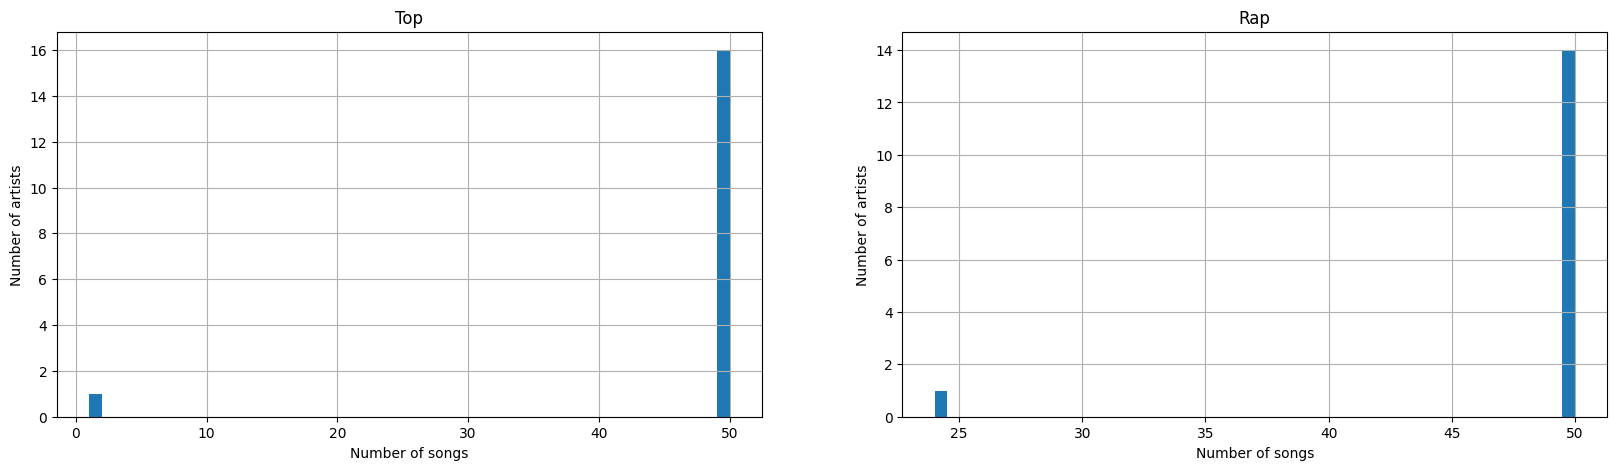

In [53]:
# plot number of songs per artists and name where artist has less than 50 songs for df_top and df_rap in a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
df_top.groupby('Artist').count()['Song'].hist(bins=50, ax=ax1)
ax1.set_title('Top')
ax1.set_xlabel('Number of songs')
ax1.set_ylabel('Number of artists')
df_rap.groupby('Artist').count()['Song'].hist(bins=50, ax=ax2)
ax2.set_title('Rap')
ax2.set_xlabel('Number of songs')
ax2.set_ylabel('Number of artists')
plt.show()

In [54]:
# plot names of artists with less than 50 songs
less50 = []
# for each artist in df_top append artist name and number of songs to less50 if number of songs is less than 50
for artist in df_top['Artist'].unique():
    if len(df_top[df_top['Artist'] == artist]) < 50:
        less50.append((artist, len(df_top[df_top['Artist'] == artist])))

for artist in df_rap['Artist'].unique():
    if len(df_rap[df_rap['Artist'] == artist]) < 50:
        less50.append((artist, len(df_rap[df_rap['Artist'] == artist])))

print(len(less50))

# print less50 artists with number of songs
for artist, songs in less50:
    print(artist, 'has', songs, 'songs')

2
ParliamentFunkadelic has 1 songs
Stack Bundles has 24 songs


In [55]:
# drop artists from less 50 from df_top and df_rap
for artist, songs in less50:
    df_top = df_top[df_top['Artist'] != artist]
    df_rap = df_rap[df_rap['Artist'] != artist]


# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))

df_top: 16
df_rap: 14


### Merge datasets

In [56]:
# merge datasets
df_songs = pd.concat([df_top, df_rap], ignore_index=True)
df_songs.head()

,Artist,Song,Lyrics
0,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
1,Amy Winehouse,Fuck Me Pumps,Fuck Me Pumps Lyrics Woo When you walk in the ...
2,Aerosmith,No More No More,No More No More Lyrics Blood stains the ivorie...
3,Elvis Costello,Whats So Funny Bout Peace Love and Understanding,Whats So Funny Bout Peace Love and Understandi...
4,Jimi Hendrix,Machine Gun Live at Fillmore East 1170 First ...,Machine Gun Live at Fillmore East 1170 Lyrics ...


In [57]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


### Drop short songs

In [58]:
# print min and max of words per song
print('min:', df_songs['Lyrics'].str.split().str.len().min())
print('max:', df_songs['Lyrics'].str.split().str.len().max())

min: 0
max: 2307


In [59]:
# print artist and song name where lyrics are empty
for index, row in df_songs.iterrows():
    if row['Lyrics'] == '':
        print('artist:', row['Artist'],'song:', row['Song'], 'is empty!')

        # drop artist and song from df_songs
        df_songs = df_songs.drop(index)

        

artist: Eurythmics song: Ministry of Love is empty!
artist: Slayer song: Delusions of Saviour is empty!
artist: Jimi Hendrix song: Jungle is empty!


In [60]:
# append lyrics word count to df_songs
df_songs['LyricsWordCount'] = df_songs['Lyrics'].str.split().str.len()

# sort df_songs by lyrics word count
df_songs = df_songs.sort_values(by=['LyricsWordCount'], ascending=True)

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
286,Kraftwerk,Dentaku,Dentaku Lyrics,2
688,Kraftwerk,Metropolis,Metropolis LyricsMetropolis Metropolis Metropo...,7
93,Kraftwerk,Spacelab,Spacelab LyricsSpacelab Spacelab Spacelab Spac...,7
368,Kraftwerk,Radioactivity Japanese Version Houshanou,Radioactivity Japanese Version Houshanou Lyric...,12
660,Kraftwerk,Its More Fun to Compute,Its More Fun to Compute LyricsIts more fun to ...,15


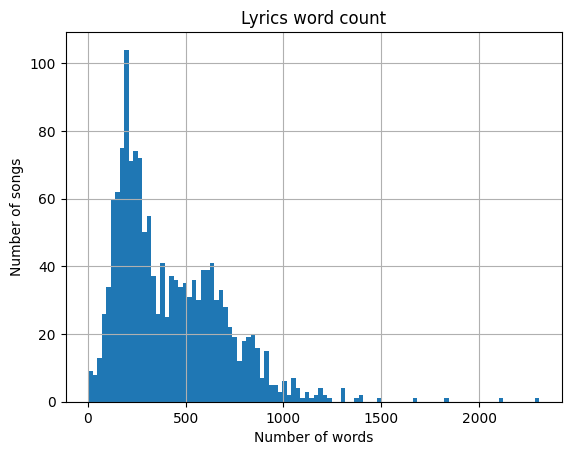

In [61]:
# plot histogram of lyrics word count
df_songs['LyricsWordCount'].hist(bins=100)
plt.title('Lyrics word count')
plt.xlabel('Number of words')
plt.ylabel('Number of songs')
plt.show()


In [62]:
# show artists of songs with less than 100 words
for index, row in df_songs.iterrows():
    if row['LyricsWordCount'] < 100:
        print(row['Artist'], row['Song'])
        

Kraftwerk Dentaku
Kraftwerk Metropolis
Kraftwerk Spacelab
Kraftwerk Radioactivity Japanese Version  Houshanou
Kraftwerk Its More Fun to Compute
Eurythmics Monkey Monkey
Kraftwerk Neon Lights
Kraftwerk Boing Boom Tschak
Kraftwerk Computer World 2
Jimi Hendrix Drifting
Kraftwerk The ManMachine
Kraftwerk Electric Café
Kraftwerk Neonlicht
Kraftwerk Home Computer
Hank Williams Ill Fly Away
Kraftwerk Vitamin
B.B. King Nobody Loves Me But My Mother
The Velvet Underground European Son
Black Thought Experience Interlude
Kraftwerk Airwaves
Kraftwerk Musik Non Stop
B.B. King Guess Who
Kraftwerk Die Roboter
Jimi Hendrix Little Wing Concerts
Alice Cooper The Awakening
Sam Cooke Tennessee Waltz
Jimi Hendrix Voodoo Chile Blues
Sam Cooke Summertime
Kraftwerk Die MenschMaschine
Kraftwerk Radioaktivität
Kraftwerk Numbers
Kraftwerk Abzug
Alice Cooper Years Ago
Kraftwerk TransEuropa Express
Kraftwerk TransEurope Express
Kraftwerk Tour de France Étape 1
Kraftwerk Computerliebe
The Velvet Underground Ride I

/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_60388/2150824440.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))


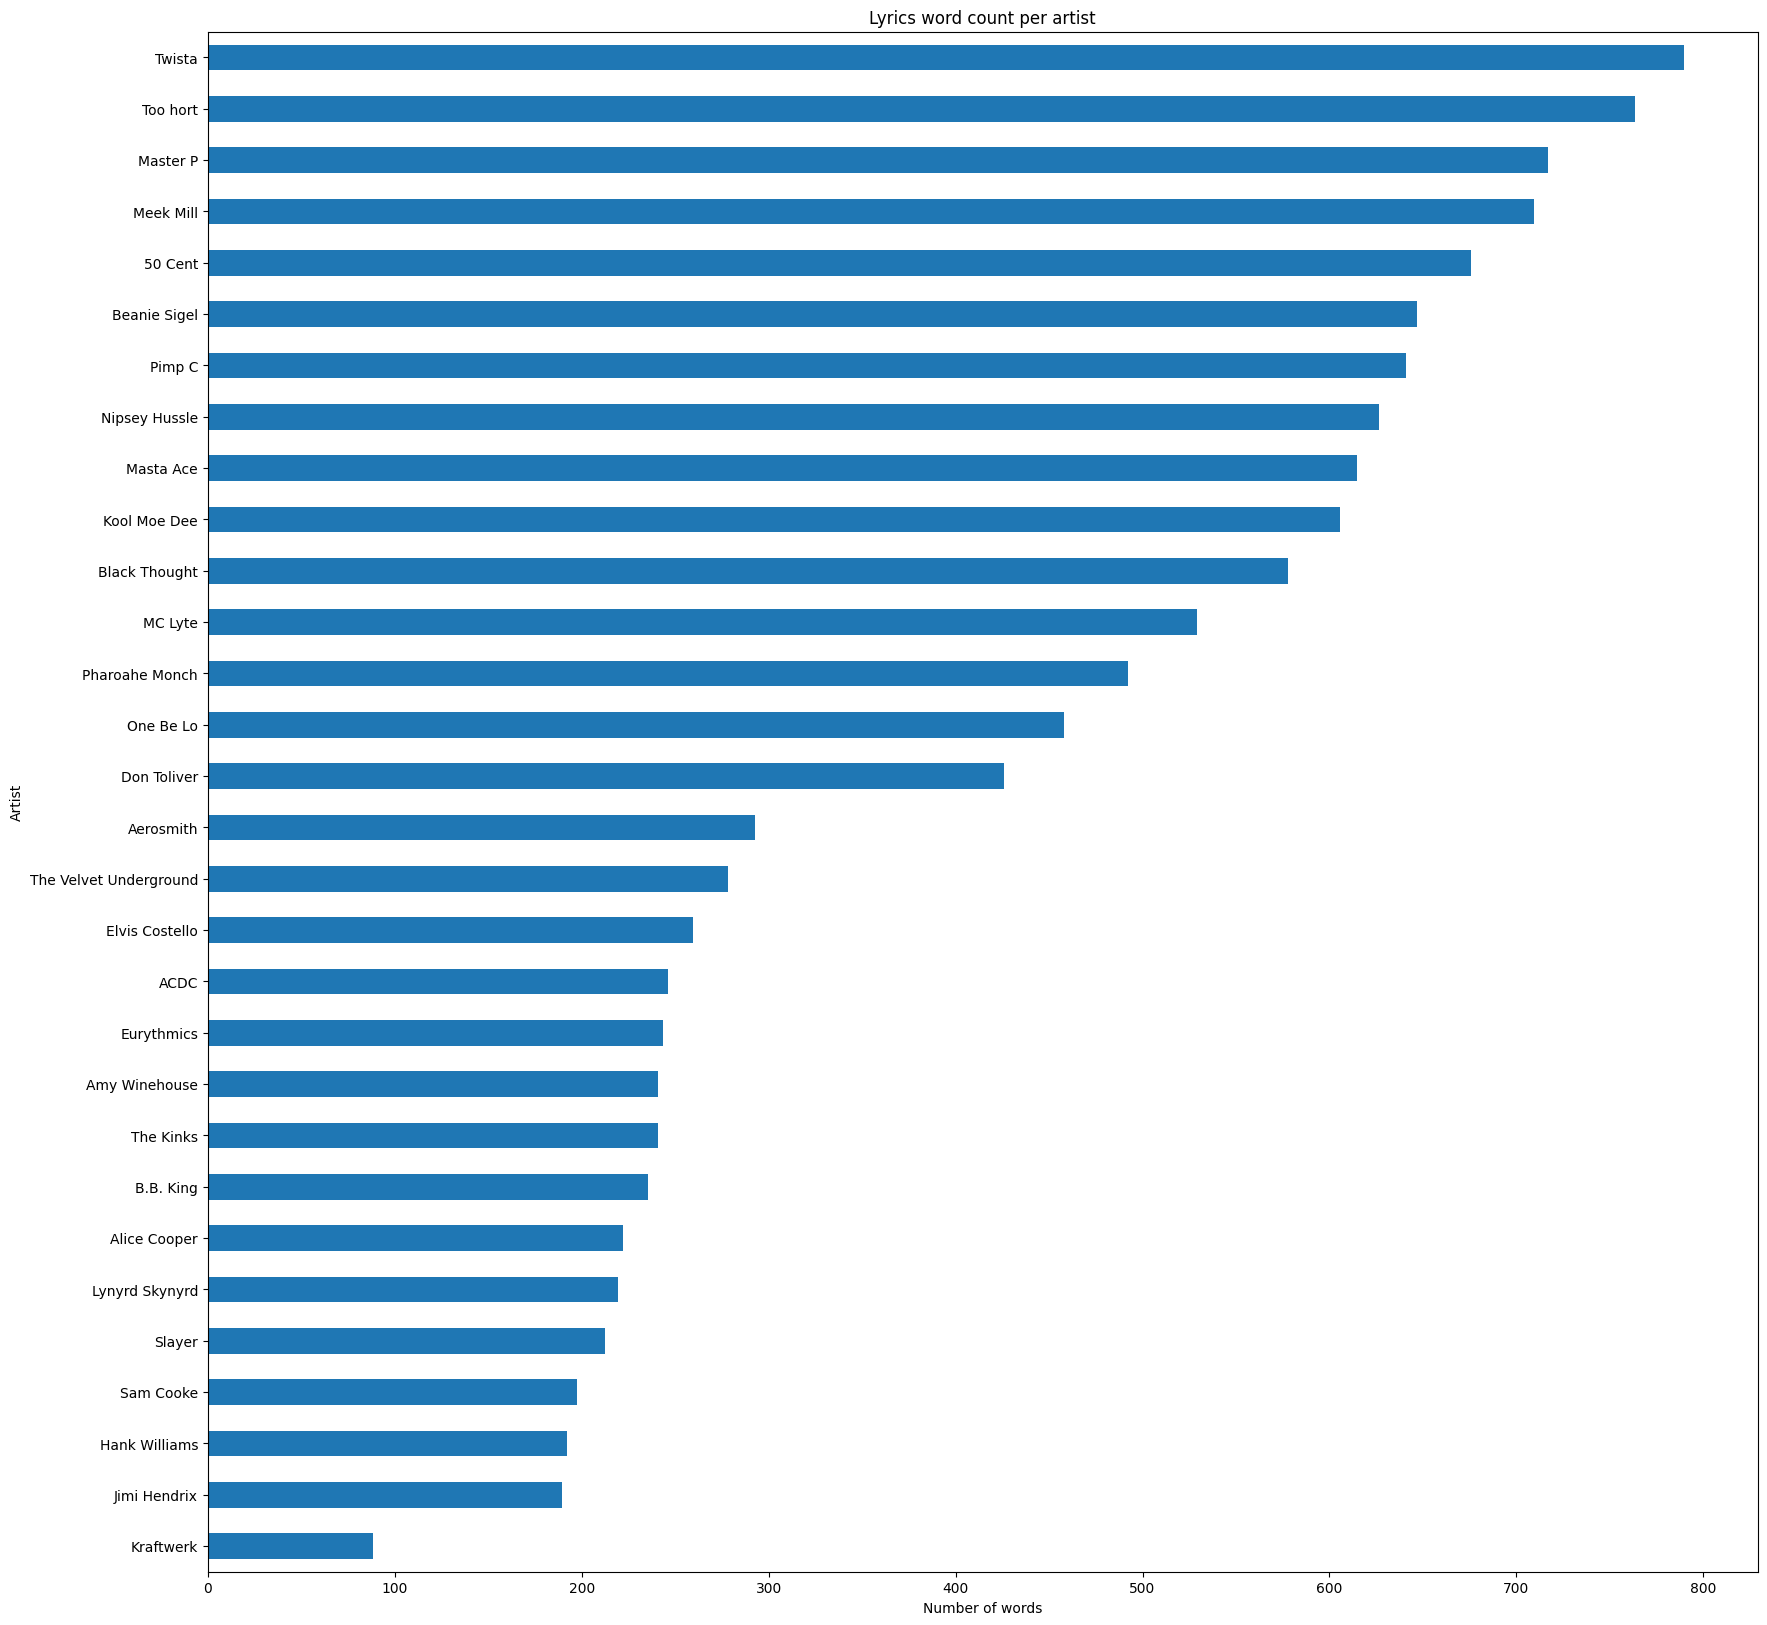

In [63]:
# plot lyrics word count per artist
df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))
plt.title('Lyrics word count per artist')
plt.xlabel('Number of words')
plt.ylabel('Artist')
plt.show()

In [64]:
# drop all songs with less than 100 words
df_songs = df_songs[df_songs['LyricsWordCount'] >= 80]

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
617,Kraftwerk,Computerliebe,Computerliebe LyricsComputerliebe Computerlieb...,80
724,The Velvet Underground,Ride Into the Sun Session Outtake,Ride Into the Sun Session Outtake Lyrics Looki...,81
373,Slayer,Raining Blood,Raining Blood Lyrics Trapped in purgatory A li...,82
779,The Velvet Underground,Jesus,Jesus Lyrics Jesus help me find my proper plac...,83
67,Kraftwerk,Europe Endless,Europe Endless Lyrics Europe endless Endless e...,83


In [65]:
# print number of lyrics per artist
df_songs.groupby('Artist').count()['Lyrics'].sort_values(ascending=True)

Artist
Kraftwerk                 27
Jimi Hendrix              46
Alice Cooper              48
B.B. King                 48
Sam Cooke                 48
Eurythmics                48
The Velvet Underground    49
Slayer                    49
Black Thought             49
Hank Williams             49
Nipsey Hussle             50
One Be Lo                 50
Pimp C                    50
Meek Mill                 50
The Kinks                 50
Pharoahe Monch            50
Master P                  50
50 Cent                   50
MC Lyte                   50
Lynyrd Skynyrd            50
Too hort                  50
Kool Moe Dee              50
Elvis Costello            50
Don Toliver               50
Beanie Sigel              50
Amy Winehouse             50
Aerosmith                 50
ACDC                      50
Masta Ace                 50
Twista                    50
Name: Lyrics, dtype: int64

In [66]:
# drop artists with less than 25 songs
for artist in df_songs['Artist'].unique():
    if len(df_songs[df_songs['Artist'] == artist]) < 30:
        df_songs = df_songs[df_songs['Artist'] != artist]

In [67]:
df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
724,The Velvet Underground,Ride Into the Sun Session Outtake,Ride Into the Sun Session Outtake Lyrics Looki...,81
373,Slayer,Raining Blood,Raining Blood Lyrics Trapped in purgatory A li...,82
779,The Velvet Underground,Jesus,Jesus Lyrics Jesus help me find my proper plac...,83
799,Amy Winehouse,There Is No Greater Love,There Is No Greater Love Lyrics There is no gr...,85
380,Jimi Hendrix,Star Spangled Banner live,Star Spangled Banner live LyricsO say can you ...,85


In [68]:
# print df-entry of longest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].max()]

,Artist,Song,Lyrics,LyricsWordCount
1393,Black Thought,Ham4Ham The Hamilton Mixtape Performance,Ham4Ham The Hamilton Mixtape Performance Lyric...,2307


In [69]:
# print df-entry of shortest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].min()]

,Artist,Song,Lyrics,LyricsWordCount
724,The Velvet Underground,Ride Into the Sun Session Outtake,Ride Into the Sun Session Outtake Lyrics Looki...,81


### Most used words

In [92]:
# get n most used words in lyrics from df
def getMostUsedWords(df, n):
    # get all words from lyrics
    words = ' '.join(df['Lyrics']).split()

    # create a dictionary with the words as keys and the number of times it appears as value
    wordsDict = {word: words.count(word) for word in words}

    # sort the dictionary by the values
    wordsDict = {k: v for k, v in sorted(wordsDict.items(), key=lambda item: item[1], reverse=True)}

    # get the first n words from the dictionary
    words = list(wordsDict.keys())[:n]

    # get the first n values from the dictionary
    values = list(wordsDict.values())[:n]

    # return the words and values
    return words, values

In [93]:
mostUsed = getMostUsedWords(df_songs, 10)

---

## Export as csv

In [42]:
exportPath = './datasets/df_songs.csv'

In [43]:
# export dataframe to csv to path
df_songs.to_csv(exportPath, index=False)